### library
1. tensorflow: fast numerical computing 
2. os: functions for interacting with the operating system
3. NumPy is a Python library used for working with arrays

In [19]:
import tensorflow as tf
import os
import numpy as np

### Database file path

In [21]:
base_dir=r"D:\Cat vs Dog\PetImages"

1. tf.keras.preprocessing.image.ImageDataGenerator:augment images in real-time while model is still training
2. Flip Horizontally command reverses the active layer horizontally.That is from left to right.
3. validation_split allows users to split their data into training and testing sets.

In [22]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    
    
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    
    validation_split=0.1
)
  

1.  For training there are 902 images
2. For validation there are 100 images
3. classes

In [23]:
train_genarator=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
    

) 

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
    

) 
  

Found 902 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


### library
1. Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
2. glob module is used to retrieve pathnames matching a specified pattern.
3. Flatten:This function converts the multi-dimensional arrays into flattened one-dimensional arrays or single-dimensional arrays.

In [24]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob

### Imagenet:labeling and categorizing images 

In [25]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [26]:
for layer in vgg.layers:
    layer.trainable=False

In [27]:
folders=glob(r"D:\Cat vs Dog\PetImages\*")
print(len(folders))

2


1. Dense Layer is used to classify image based on output from convolutional layers.
2. Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities.

In [42]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
epoch=50

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/50
15/15 [==============================] - 317s 22s/step - loss: 0.6415 - accuracy: 0.6896 - val_loss: 0.3175 - val_accuracy: 0.9200
Epoch 2/50
15/15 [==============================] - 333s 22s/step - loss: 0.3504 - accuracy: 0.8614 - val_loss: 0.1881 - val_accuracy: 0.9500
Epoch 3/50
15/15 [==============================] - 305s 21s/step - loss: 0.2710 - accuracy: 0.8969 - val_loss: 0.1664 - val_accuracy: 0.9700
Epoch 4/50
15/15 [==============================] - 334s 22s/step - loss: 0.2270 - accuracy: 0.9146 - val_loss: 0.1383 - val_accuracy: 0.9800
Epoch 5/50
15/15 [==============================] - 301s 20s/step - loss: 0.2207 - accuracy: 0.9213 - val_loss: 0.2088 - val_accuracy: 0.9000
Epoch 6/50
15/15 [==============================] - 295s 20s/step - loss: 0.1910 - accuracy: 0.9224 - val_loss: 0.1215 - val_accuracy: 0.9800
Epoch 7/50
15/15 [==============================] - 292s 21s/step - loss: 0.1911 - accuracy: 0.9346 - val_loss: 0.1155 - val_accuracy: 0.9600
Epoch 

### library
1. Converts a PIL Image instance to a Numpy array.
2. nInsert a new axis that will appear at the axis position in the expanded array shape

In [41]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

img_pred=image.load_img(r"D:\Cat vs Dog\Dog_test\586.JPG",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="Cat"   
else:
    prediction="Dog"
print(prediction)

1/1 [==============================] - 0s 134ms/step
[[0. 1.]]
Dog


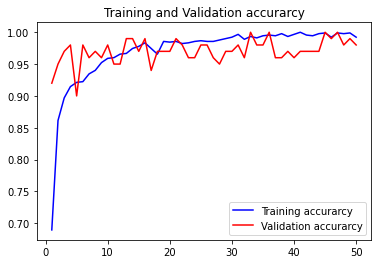

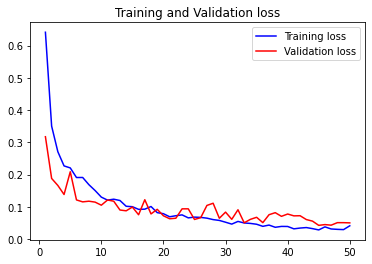

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()